In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
import pandas as pd
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import webcolors as wc
import os

In [2]:
img = cv2.imread('2.jpg')
img=cv2.resize(img,(700,500))

clicked = False
r = g = b = xpos = ypos = 0

index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

def rgb2hex(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            hexcode = csv.loc[i,"hex"]
    return hexcode

def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
cv2.namedWindow('color detection')
cv2.setMouseCallback('color detection',draw_function)

while(1):
    cv2.imshow("color detection",img)
    if (clicked):
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)
        text = getColorName(r,g,b) + ' (hexcode = ' + rgb2hex(r,g,b) + ')'
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)            
        clicked=False
    if cv2.waitKey(20) & 0xFF ==27:
        break  
        
cv2.destroyAllWindows()

In [3]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
def RGB2HEX(color):
    R = color[0]
    G = color[1]
    B = color[2]
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            hexcode = csv.loc[i,"hex"]
    return hexcode

In [5]:
def getCName(color):
    R = color[0]
    G = color[1]
    B = color[2]
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [6]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    cnames = [getCName(ordered_colors[i]) for i in counts.keys()]
    cnames_hex = [(cnames[i]  + " " + hex_colors[i]) for i in counts.keys()]
    

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = cnames_hex, colors = hex_colors)
    
    return rgb_colors

[array([201.86230196, 152.01428379, 121.25545267]),
 array([173.98462077,  95.97977646,  67.6453731 ]),
 array([217.26269505, 194.4811377 , 173.93219549]),
 array([55.54594516, 44.09859977, 30.79091307]),
 array([229.32267569, 229.18398011, 219.62969929])]

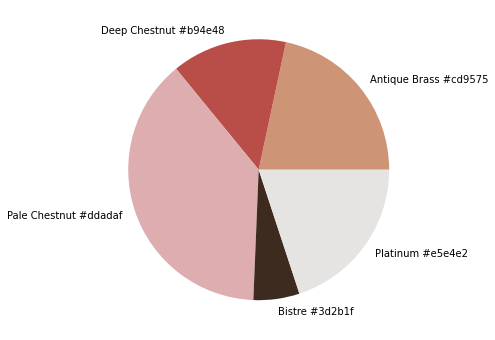

In [7]:
get_colors(get_image('2.jpg'), 5, True)

In [8]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 255],
    'YELLOW': [255, 255, 0],
    'RED' : [255,0,0],
    'WHITE': [0,103,165],
    'PINK' : [252,192,203]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

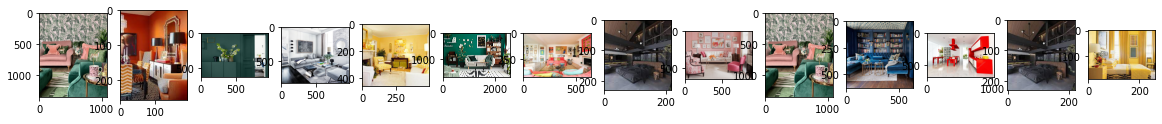

In [9]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [10]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 5): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [11]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

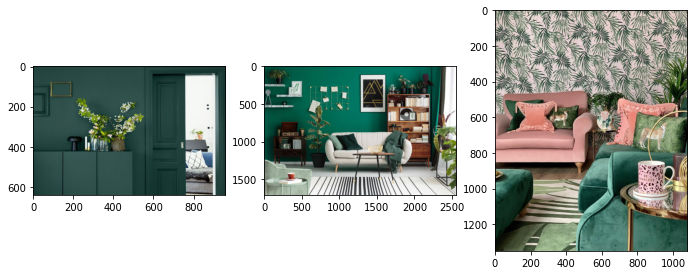

In [12]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

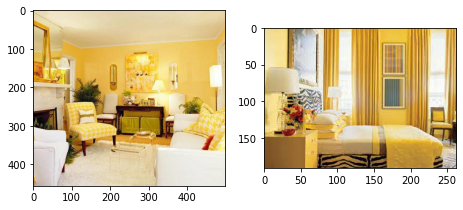

In [13]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

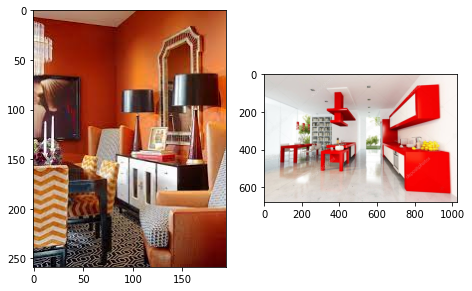

In [14]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)